# **Exploratory Data Analysis on MovieLens20M dataset**


----


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [2]:
# also set a random state
rs = 123

### Load and explore the dataset


First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.


In [4]:
movie_df = pd.read_csv('movie.csv')
ratings_df = pd.read_csv('rating.csv.gz')
tag_df = pd.read_csv('tag.csv')
link_df = pd.read_csv('link.csv')
genome_tags_df = pd.read_csv('genome_tags.csv')
genome_scores_df = pd.read_csv('genome_scores.csv.gz')

Let's first take a look at the datasets.

In [5]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [7]:
tag_df.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [8]:
link_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [10]:
genome_scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [10]:
print('movie_df.shape:', movie_df.shape,'; ratings_df.shape:', ratings_df.shape)

movie_df.shape: (27278, 3) ; ratings_df.shape: (20000263, 4)


Since here we don't use the time stamp for the moment, let us remove it from the user-rating matrix (URM)

In [11]:
urm_df = ratings_df.drop('timestamp',axis=1)
urm_df.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


We can check how many unique movies are rated, and how many unique users have rated a movie.

In [12]:
print('Number of rated movies:', urm_df['movieId'].unique().size,'; number of unique users:', urm_df['userId'].unique().size)

Number of rated movies: 26744 ; number of unique users: 138493


Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.


In [13]:
gen_list = [genre.split('|') for genre in movie_df['genres'].astype(str)]
genres = [x for y in gen_list for x in y]

In [14]:
genres = pd.DataFrame({'Genres':genres})

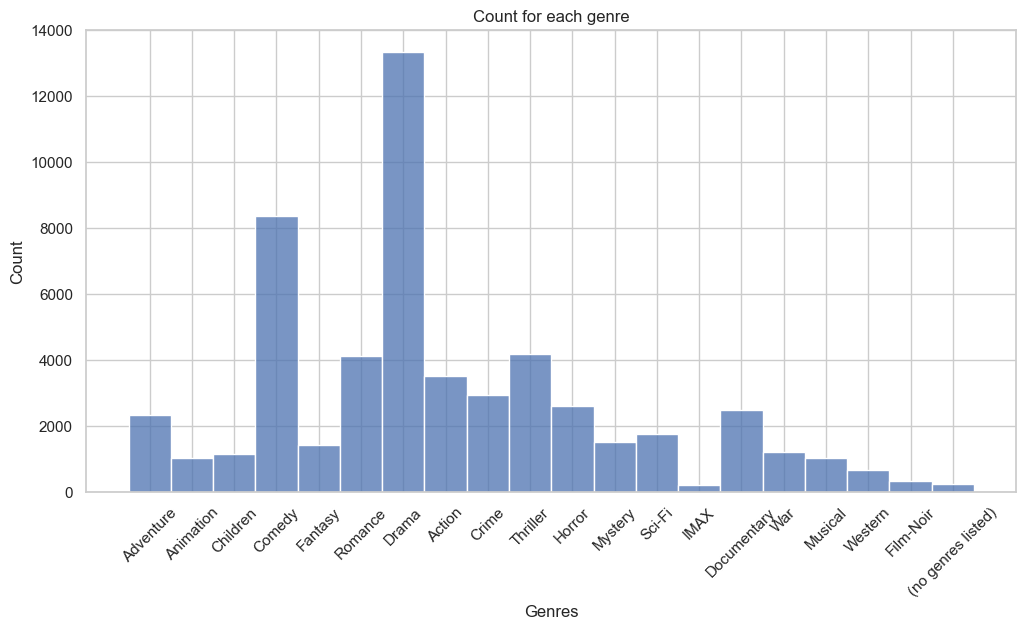

In [15]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.title('Count for each genre')
sns.histplot(data=genres, x='Genres') 
plt.xticks(rotation=45)
plt.show()

As we can see from the ```histplot```,  the most popular genres are Drama and Comedy. Only a few items have its genres not listed

### Plot a Word Cloud from Movie Tags


First, let's join all the tag values into one string, then we can conveniently get a wordcloud from the big string:


In [16]:
tag_df['tag']

0           Mark Waters
1             dark hero
2             dark hero
3         noir thriller
4             dark hero
              ...      
465559          dragged
465560    Jason Bateman
465561           quirky
465562              sad
465563    rise to power
Name: tag, Length: 465564, dtype: object

In [17]:
tag = " ".join(tag for tag in tag_df['tag'].astype(str))

In [18]:
# English Stopwords
stopwords = set(STOPWORDS)

Then, we create a ```WordCloud``` object and generate ```wordcloud``` from the tags.


In [19]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
stopwords.update(["based", "using", "enabling", "template", "university", "end", "introduction", "ending"])

In [20]:
wordcloud.generate(tag)

We can use `plt.imshow()` method to visualize the generated wordcloud:


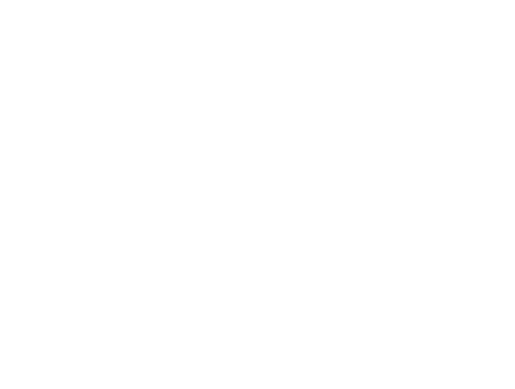

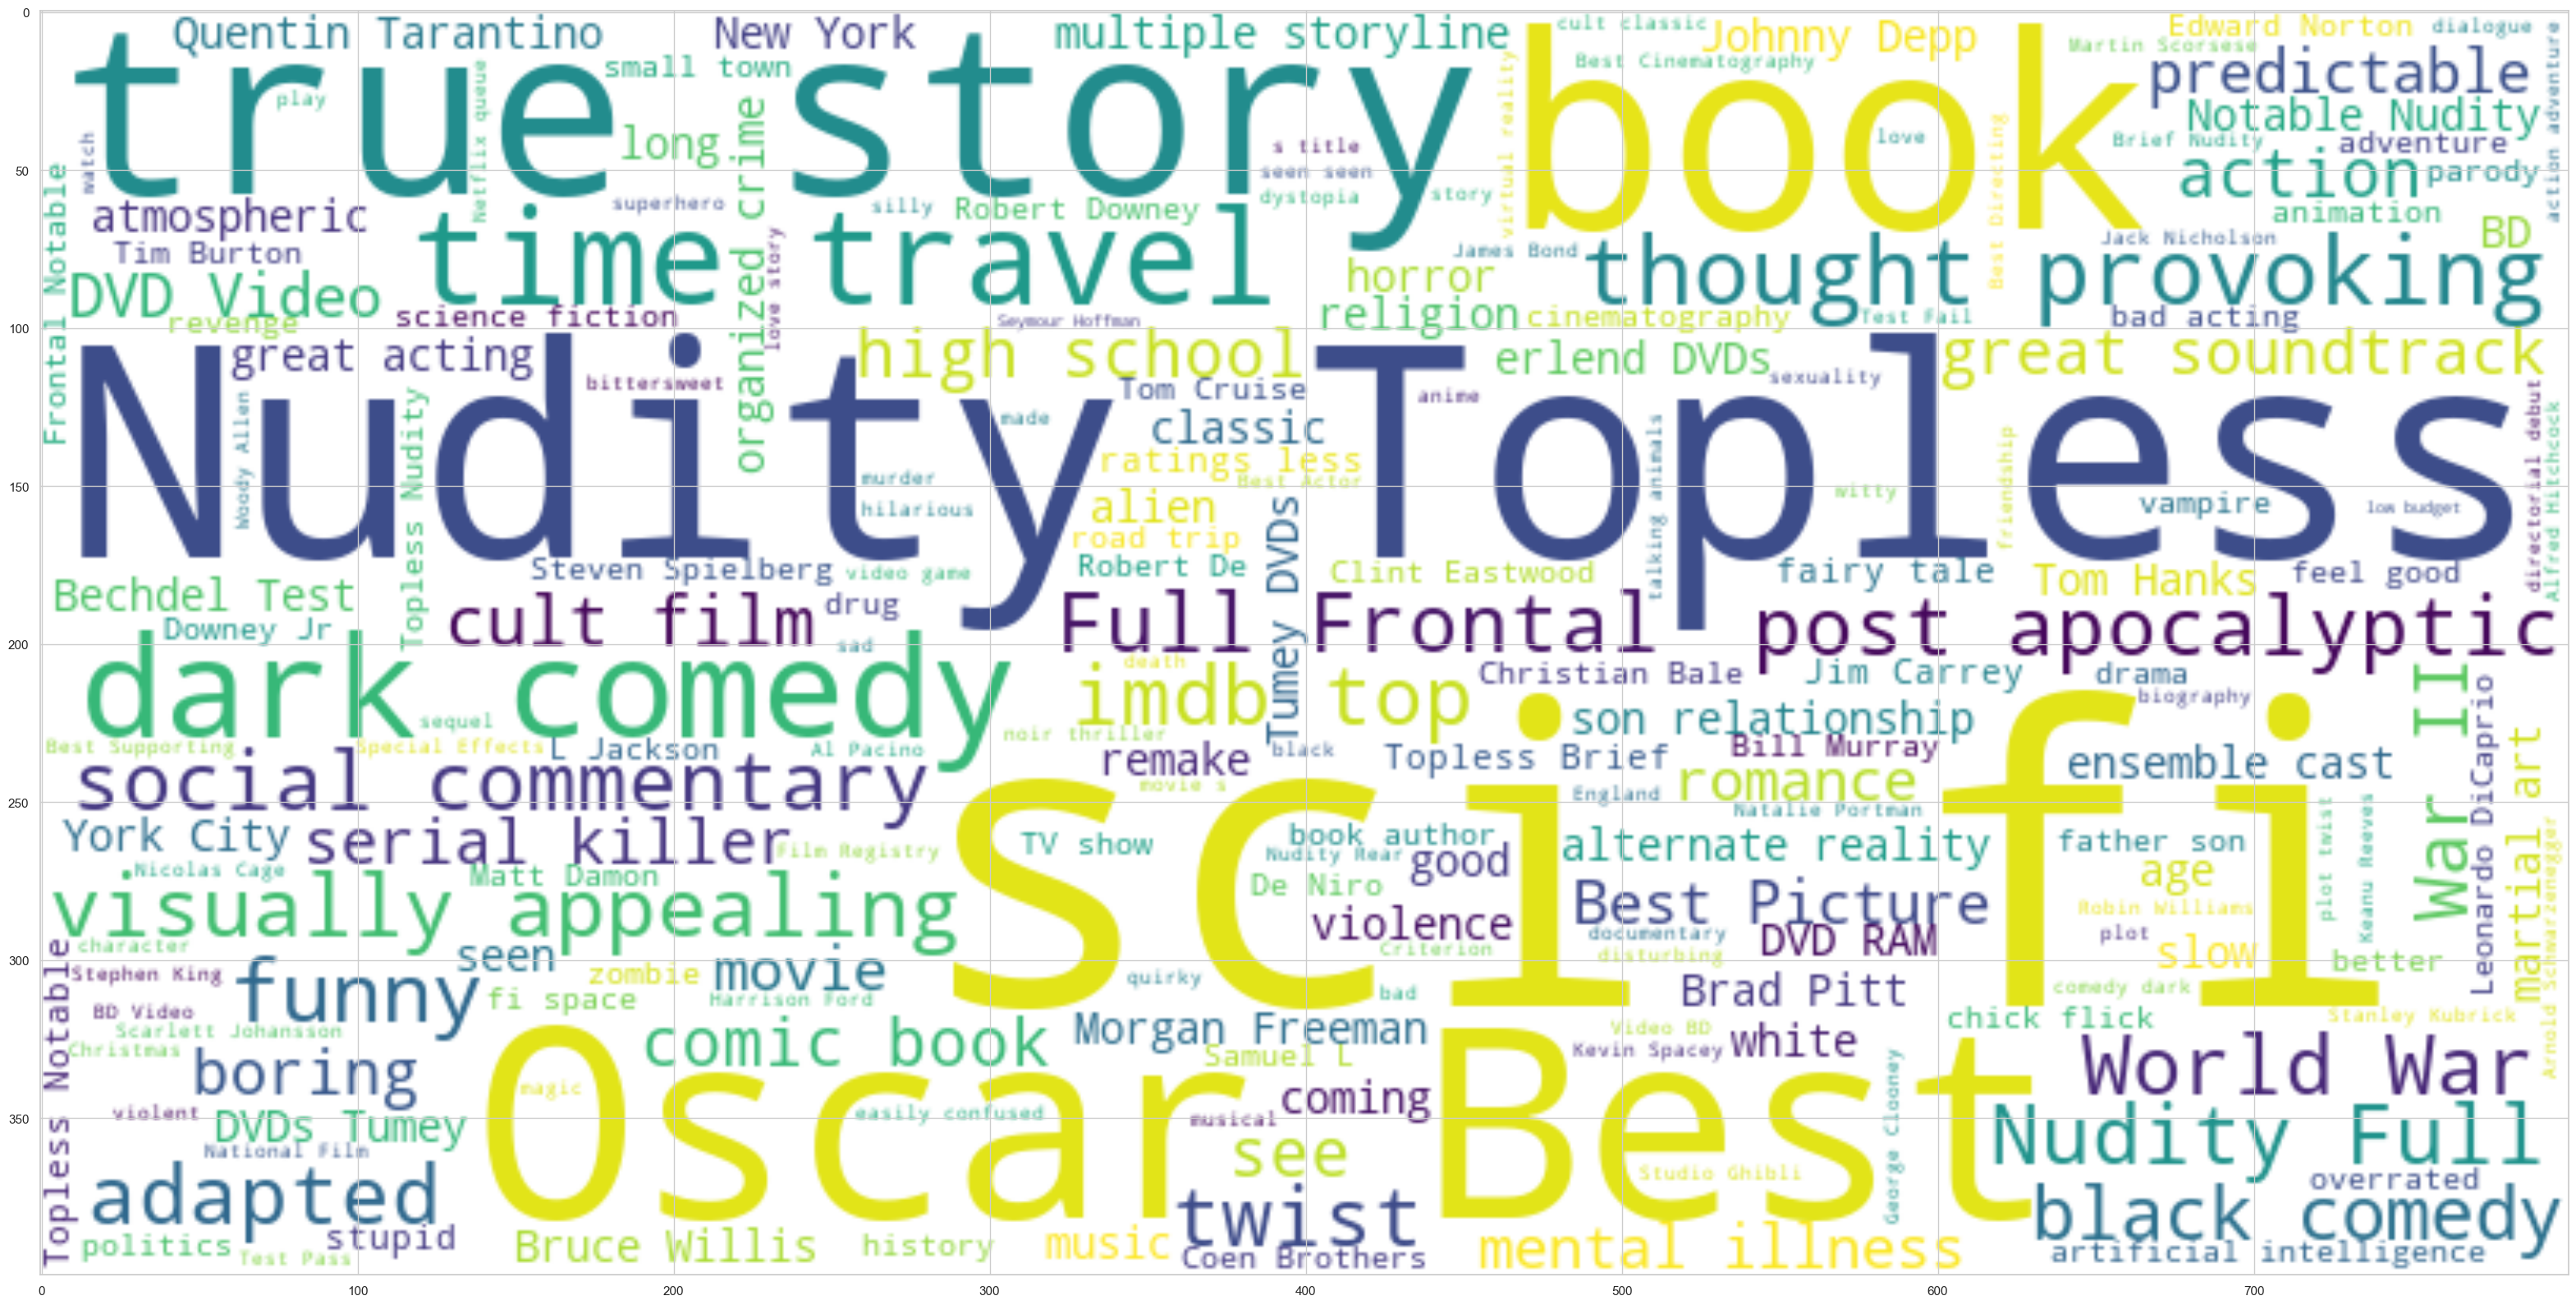

In [21]:
# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(40,20))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

As we can see from the ```wordcloud```,  many items have been tagged to contain nudity. This is important for parental advisory.


Next, we need to perform some more detailed analysis on the course dataset.


# Analyze Movie Genres


Let's first take a look at the course enrollments dataset.


In [22]:
urm_df.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


This dataset contains three colums, `userId` representing a unique user id, `movieId` representing a movie id, and `rating` representing the ratings given by the user.


In [23]:
urm_df['rating'].unique()

array([3.5, 4. , 3. , 4.5, 5. , 2. , 1. , 2.5, 0.5, 1.5])

The **rating** column consists of semi integer values ranging from 0.5 to 5.0: 



Let's see how many ratings we have in the dataset:


In [24]:
urm_df.shape[0]

20000263

We have 20000263 ratings. In fact, each user is likely to interact with multiple movies so let's find the rating counts for each user:


In [25]:
user_rating = urm_df.groupby(['userId']).size()
user_rating = pd.DataFrame(user_rating).reset_index().rename(columns={0: "count"})

In [26]:
user_rating['count'].describe()


count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
Name: count, dtype: float64

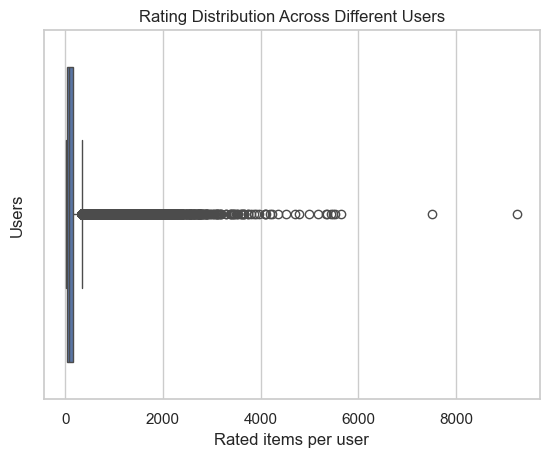

In [27]:
#plt.figure(figsize=(12, 8))
sns.boxplot(x=user_rating['count'])
plt.title('Rating Distribution Across Different Users')
plt.xlabel('Rated items per user')
plt.ylabel('Users')
plt.show()

We can there are outliers with some users rating more than 8000 movies. Probably these are not regular users, maybe professionals of the movie industry. Next we remove them assuming a regular user rates less than 500 movies.


In [28]:
user_rating[user_rating['count'] < 500].describe()

,userId,count
count,131002.000000,131002.000000
mean,69291.919337,102.447650
std,39971.652668,99.147957
min,1.000000,20.000000
25%,34677.250000,33.000000
50%,69263.000000,63.000000
75%,103928.750000,132.000000
max,138493.000000,499.000000


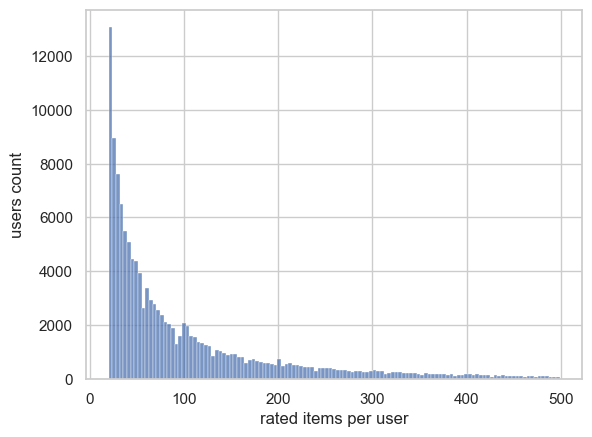

In [29]:

sns.histplot(data=user_rating[user_rating['count'] < 500], x='count') 
plt.ylabel('users count')
plt.xlabel('rated items per user')
plt.show()

We can see that more than 12000 users rated 20 movies.

### Find the Top-20 Most Popular Movies


Now we know how many items each user rated. Let's see the most popular 20 movies, i.e., items with the most rating counts (watched).Later we also have a look at the list of the top-20 highly rated movies.


In [30]:
movie_rating = ratings_df.groupby('movieId').size().sort_values(ascending=False).head(20)
movie_rating = pd.DataFrame(movie_rating, columns=['watched'])


In [31]:
movie_rating = movie_rating.rename_axis('movieId').reset_index()
movie_rating

,movieId,watched
0,296,67310
1,356,66172
2,318,63366
3,593,63299
4,480,59715
5,260,54502
6,110,53769
7,589,52244
8,2571,51334
9,527,50054


Now we only see the item IDs which do not indicate what movies they are. To make it more clear, we need to join the movie titles in the movie metadata dataset (`movie_df`) so that we can identify what the most popular movies are immediately:


In [32]:
top20_df = pd.merge(movie_rating, movie_df[['movieId', 'title']], on = 'movieId')
top20_df

,movieId,watched,title
0,296,67310,Pulp Fiction (1994)
1,356,66172,Forrest Gump (1994)
2,318,63366,"Shawshank Redemption, The (1994)"
3,593,63299,"Silence of the Lambs, The (1991)"
4,480,59715,Jurassic Park (1993)
5,260,54502,Star Wars: Episode IV - A New Hope (1977)
6,110,53769,Braveheart (1995)
7,589,52244,Terminator 2: Judgment Day (1991)
8,2571,51334,"Matrix, The (1999)"
9,527,50054,Schindler's List (1993)


Now, instead of sorting by the most watched movies, we sort by the sum of ratings the movie received. 

In [33]:
df = ratings_df.groupby(['movieId'])[['rating']].sum().sort_values(ascending=False,by='rating').reset_index().head(20)
df

,movieId,rating
0,318,281788.0
1,296,280967.5
2,356,266607.0
3,593,264403.5
4,260,228400.0
5,480,218840.0
6,110,217363.0
7,527,215741.5
8,2571,214945.0
9,589,205421.0


In [34]:
top20_df = pd.merge(df, movie_df[['movieId', 'title']], on = 'movieId')
top20_df

,movieId,rating,title
0,318,281788.0,"Shawshank Redemption, The (1994)"
1,296,280967.5,Pulp Fiction (1994)
2,356,266607.0,Forrest Gump (1994)
3,593,264403.5,"Silence of the Lambs, The (1991)"
4,260,228400.0,Star Wars: Episode IV - A New Hope (1977)
5,480,218840.0,Jurassic Park (1993)
6,110,217363.0,Braveheart (1995)
7,527,215741.5,Schindler's List (1993)
8,2571,214945.0,"Matrix, The (1999)"
9,589,205421.0,Terminator 2: Judgment Day (1991)
